In [ ]:
#Import the libraries
import pandas
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Get the stock quote
df = web.DataReader('AAPL', data_source='stooq', start='2012-01-01', end='2023-02-07')
#Show the data
df

,Open,High,Low,Close,Volume
Date,,,,,
2023-02-07,150.6400,155.2300,150.6400,154.6500,8.332255e+07
2023-02-06,152.5750,153.1000,150.7800,151.7300,6.985831e+07
2023-02-03,148.0300,157.3800,147.8300,154.5000,1.543573e+08
2023-02-02,148.9000,151.1800,148.1700,150.8200,1.183390e+08
2023-02-01,143.9700,146.6100,141.3200,145.4300,7.766363e+07
...,...,...,...,...,...
2012-01-09,12.9525,13.0213,12.8289,12.8408,4.620092e+08
2012-01-06,12.7800,12.8717,12.7630,12.8608,3.734286e+08
2012-01-05,12.6314,12.7422,12.5627,12.7272,3.178972e+08


In [ ]:
#Get the number of rows and columns in the data set
df.shape

(2792, 5)

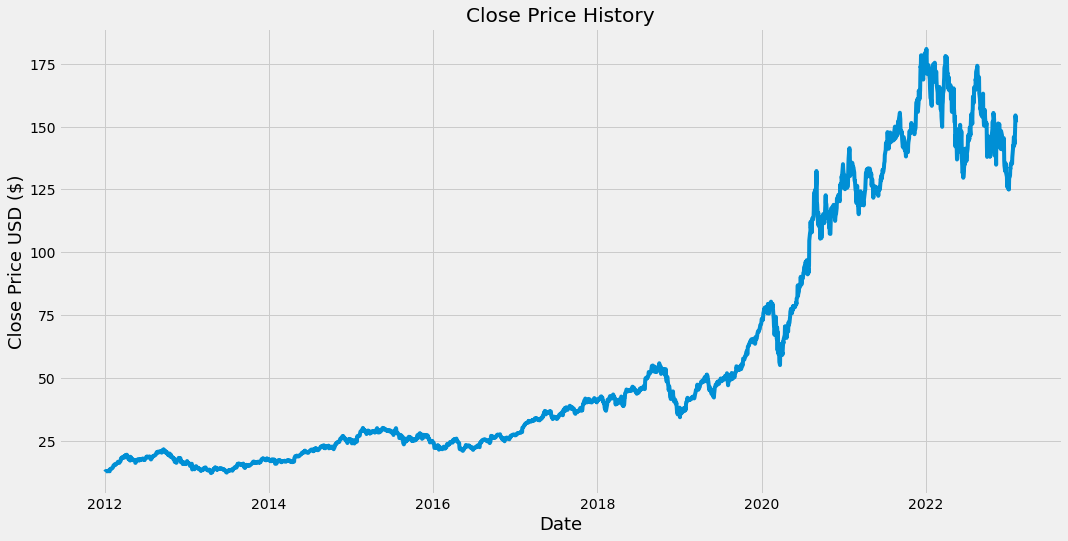

In [ ]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
#Create a new dataframe with only the Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

2234

In [ ]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.82694451],
       [0.84334534],
       [0.8215565 ],
       ...,
       [0.00392554],
       [0.00309307],
       [0.00269755]])

In [ ]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.82694451, 0.84334534, 0.8215565 , 0.78964296, 0.78289316,
       0.77525522, 0.7926034 , 0.78093926, 0.76850542, 0.77247241,
       0.76406476, 0.7448811 , 0.72948681, 0.72913156, 0.7334538 ,
       0.72646716, 0.71847398, 0.71894765, 0.70260602, 0.69917191,
       0.69603384, 0.66879779, 0.67673177, 0.66909383, 0.69786931,
       0.69597463, 0.67483709, 0.6984614 , 0.70929661, 0.71148734,
       0.73055257, 0.7119018 , 0.71231626, 0.72498694, 0.7367695 ,
       0.7764986 , 0.78987979, 0.78407733, 0.77028168, 0.77318291,
       0.76305821, 0.77472234, 0.79674802, 0.80373465, 0.80669509,
       0.80503725, 0.76442001, 0.78247869, 0.80551092, 0.82303672,
       0.81776714, 0.80491883, 0.82433932, 0.82096442, 0.80953712,
       0.81693822, 0.80651747, 0.81492512, 0.79816903, 0.72711846])]
[0.7545321379470412]



In [ ]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2174, 60, 1)

In [ ]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2174/2174 [==============================] - 85s 37ms/step - loss: 0.0017


In [ ]:
#Create the testing data set
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
  

In [ ]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

18/18 [==============================] - 1s 19ms/step


In [ ]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.6407705604361803

<ipython-input-32-531f2f8786e2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


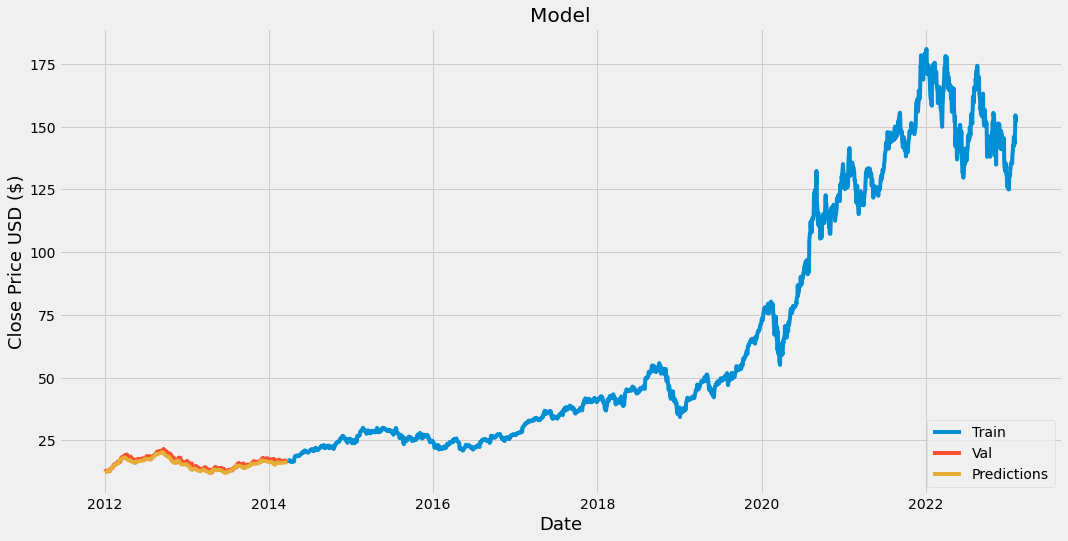

In [ ]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len: ]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2014-03-24,17.0789,16.323866
2014-03-21,16.8785,16.351591
2014-03-20,16.7459,16.352911
2014-03-19,16.8277,16.327566
2014-03-18,16.8317,16.295193
...,...,...
2012-01-09,12.8408,12.359122
2012-01-06,12.8608,12.334700
2012-01-05,12.7272,12.317818


In [ ]:
#Get the quote
apple_quote = web.DataReader('AAPL', data_source='stooq', start='2012-01-01', end='2023-02-07')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 38ms/step
[[12.216605]]
